In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
DIRECTORY= r"D:\Conputer vision\Thesis Rice"
CATAGORIES=['bacterial_leaf_blight','brown_spot','healthy','leaf_blast','leaf_scald','narrow_brown_spot','neck_blast','rice_hispa','sheath_blight','Tungro']

In [3]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)


        
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(224,224))
        
        data.append([img_arr,label])

In [4]:
data

[[array([[[213, 216, 231],
          [213, 216, 231],
          [213, 216, 231],
          ...,
          [213, 216, 231],
          [213, 216, 231],
          [213, 216, 231]],
  
         [[213, 216, 231],
          [213, 216, 231],
          [213, 216, 231],
          ...,
          [213, 216, 231],
          [213, 216, 231],
          [213, 216, 231]],
  
         [[213, 216, 231],
          [213, 216, 231],
          [213, 216, 231],
          ...,
          [213, 216, 231],
          [213, 216, 231],
          [213, 216, 231]],
  
         ...,
  
         [[213, 216, 231],
          [213, 216, 231],
          [213, 216, 231],
          ...,
          [213, 216, 231],
          [213, 216, 231],
          [213, 216, 231]],
  
         [[213, 216, 231],
          [213, 216, 231],
          [213, 216, 231],
          ...,
          [213, 216, 231],
          [213, 216, 231],
          [213, 216, 231]],
  
         [[213, 216, 231],
          [213, 216, 231],
          [213, 216, 231

In [5]:
random.shuffle(data)

In [6]:
x=[]
y=[]

for features,label in data:
    x.append(features)
    y.append(label)

In [7]:
X= np.array(x)
Y=np.array(y)

In [8]:
x

[array([[[188, 192, 193],
         [189, 190, 194],
         [189, 190, 193],
         ...,
         [206, 206, 206],
         [205, 205, 205],
         [206, 206, 206]],
 
        [[189, 193, 194],
         [190, 192, 193],
         [188, 190, 191],
         ...,
         [206, 206, 206],
         [208, 206, 208],
         [206, 206, 206]],
 
        [[191, 192, 196],
         [192, 194, 195],
         [193, 195, 196],
         ...,
         [204, 204, 204],
         [205, 205, 205],
         [205, 205, 205]],
 
        ...,
 
        [[191, 189, 188],
         [190, 188, 187],
         [189, 187, 187],
         ...,
         [200, 198, 198],
         [200, 198, 197],
         [201, 199, 198]],
 
        [[191, 189, 189],
         [189, 187, 186],
         [192, 190, 189],
         ...,
         [199, 198, 198],
         [202, 197, 198],
         [204, 202, 201]],
 
        [[193, 189, 188],
         [189, 187, 186],
         [190, 185, 186],
         ...,
         [200, 198, 198],
  

In [9]:
X = X.astype('float32') / 255.0

In [10]:
X

array([[[[0.7372549 , 0.7529412 , 0.75686276],
         [0.7411765 , 0.74509805, 0.7607843 ],
         [0.7411765 , 0.74509805, 0.75686276],
         ...,
         [0.80784315, 0.80784315, 0.80784315],
         [0.8039216 , 0.8039216 , 0.8039216 ],
         [0.80784315, 0.80784315, 0.80784315]],

        [[0.7411765 , 0.75686276, 0.7607843 ],
         [0.74509805, 0.7529412 , 0.75686276],
         [0.7372549 , 0.74509805, 0.7490196 ],
         ...,
         [0.80784315, 0.80784315, 0.80784315],
         [0.8156863 , 0.80784315, 0.8156863 ],
         [0.80784315, 0.80784315, 0.80784315]],

        [[0.7490196 , 0.7529412 , 0.76862746],
         [0.7529412 , 0.7607843 , 0.7647059 ],
         [0.75686276, 0.7647059 , 0.76862746],
         ...,
         [0.8       , 0.8       , 0.8       ],
         [0.8039216 , 0.8039216 , 0.8039216 ],
         [0.8039216 , 0.8039216 , 0.8039216 ]],

        ...,

        [[0.7490196 , 0.7411765 , 0.7372549 ],
         [0.74509805, 0.7372549 , 0.73333335]

In [11]:
X.shape

(1150, 224, 224, 3)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [13]:
model=Sequential()

model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(10,activation='softmax'))

C:\Users\Msi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(X,Y,epochs=15,validation_split=0.2)

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 938ms/step - accuracy: 0.1772 - loss: 2.2190 - val_accuracy: 0.2652 - val_loss: 1.9841
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 876ms/step - accuracy: 0.3783 - loss: 1.7840 - val_accuracy: 0.4087 - val_loss: 1.7319
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 917ms/step - accuracy: 0.5402 - loss: 1.3969 - val_accuracy: 0.4957 - val_loss: 1.4863
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 860ms/step - accuracy: 0.6141 - loss: 1.1613 - val_accuracy: 0.5870 - val_loss: 1.2951
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 884ms/step - accuracy: 0.6576 - loss: 0.9575 - val_accuracy: 0.5435 - val_loss: 1.3408
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 913ms/step - accuracy: 0.7533 - loss: 0.7502 - val_accuracy: 0.5739 - val_loss: 1.3155
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 898ms/step - accuracy: 0.8011 - loss: 0.6320 - val_accuracy: 0.6043 - val_loss: 1.3406
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 885ms/step - accuracy: 0.8152 - loss: 0.5421 - val_accu

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,504 (2.81 MB)

 Trainable params: 245,834 (960.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 491,670 (1.88 MB)

In [17]:
from keras.preprocessing import image
import numpy as np
img_pred = image.load_img(r"D:\Conputer vision\Thesis Rice\neck_blast\neck_blast940.jpg",target_size=(224, 224))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred / 255.0

rslt = model.predict(img_pred)
class_labels = ["bacterial_leaf_blight","brown_spot","healthy","leaf_blast","leaf_scald","narrow_brown_spot","neck_blast","rice_hispa","sheath_blight","Tungro"]

predicted_class_index = np.argmax(rslt)
prediction = class_labels[predicted_class_index]
print("Predicted Disease:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Disease: neck_blast


In [18]:
confidence = np.max(rslt) * 100
print("Predicted Disease:", prediction)
print("Confidence:", round(confidence, 2), "%")

Predicted Disease: neck_blast
Confidence: 100.0 %


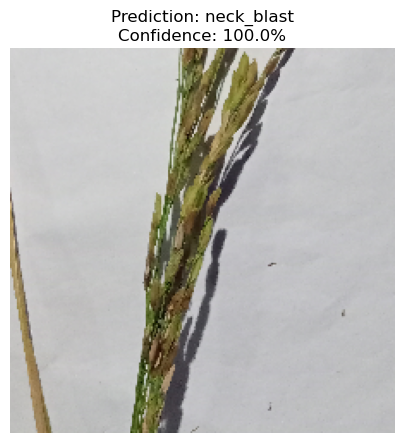

In [19]:
import matplotlib.pyplot as plt
import numpy as np

display_img = (img_pred[0] * 255).astype(np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(display_img)
plt.axis("off")
plt.title(f"Prediction: {prediction}\nConfidence: {round(confidence, 2)}%")
plt.show()

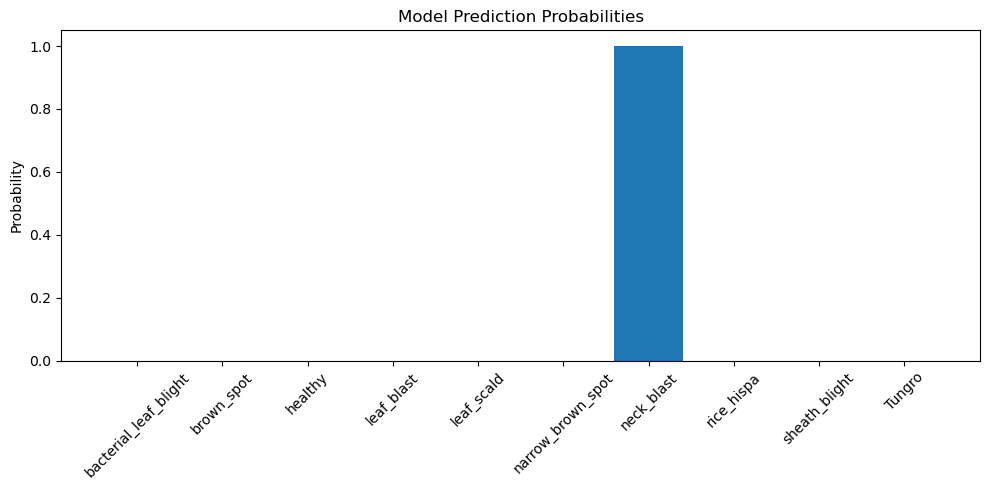

In [21]:
plt.figure(figsize=(10,5))
plt.bar(class_labels, rslt[0])
plt.xticks(rotation=45)
plt.ylabel("Probability")
plt.title("Model Prediction Probabilities")
plt.tight_layout()
plt.show()